# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


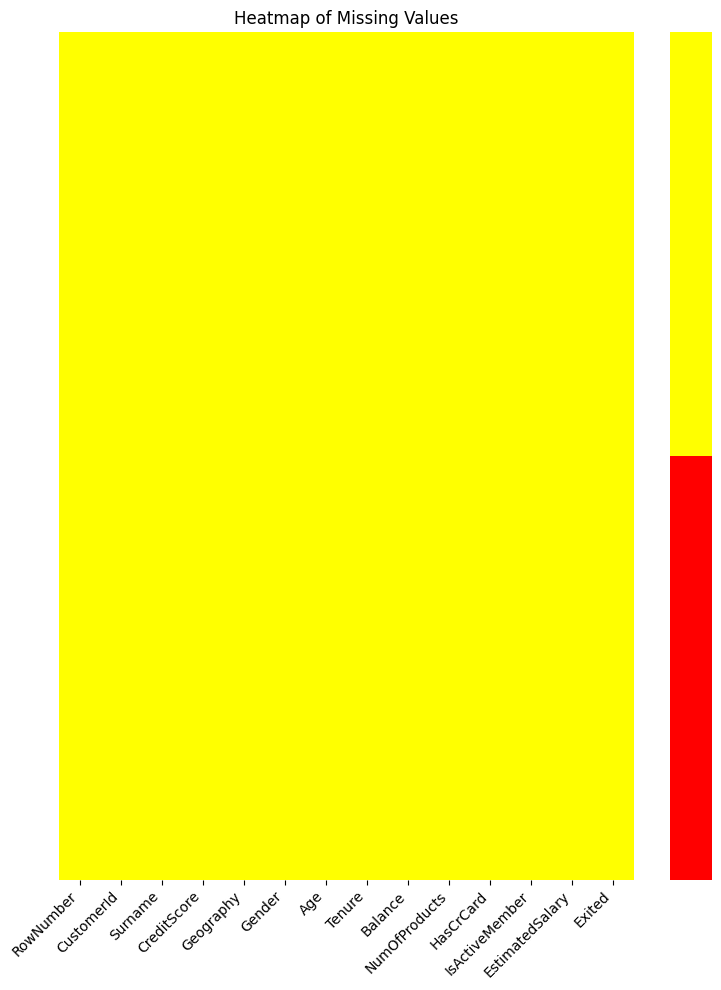

In [3]:
plt.figure(figsize=(8, 10))

heatmap = sns.heatmap(df.isna(), 
                      cmap=['red', 'yellow'],
                      cbar_kws={'ticks': []},
                      xticklabels=True,
                      yticklabels=False)

colorbar = heatmap.collections[0].colorbar
colorbar.set_label('') 

ax = plt.gca()
ax.set_title('Heatmap of Missing Values')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()

# Feature Engineering

In [4]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
#Encode categorical variables
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [6]:
onehot_encoder_geo = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(df[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [7]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [8]:
geo_encoded_df = pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [9]:
df = pd.concat([df.drop('Geography',axis=1),geo_encoded_df],axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


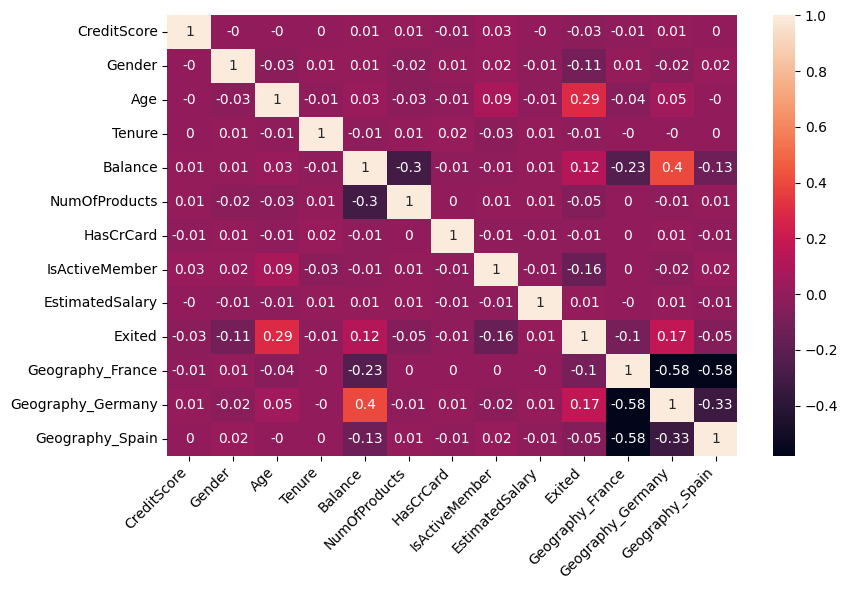

In [10]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr().round(2),annot=True)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [11]:
X = df.drop('Exited',axis=1)
y = df['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN Implementation

In [12]:
(X_train.shape[1],)

(12,)

## Building ANN Model

In [13]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), #HL1
    Dense(32,activation='relu'), #HL2p
    Dense(1, activation='sigmoid') #output layer
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

## Setting loss and Optimizer

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x000001F47E28A480>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

## Compiling With Model

In [16]:
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

## Setting up TensorBoard

In [17]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir= log_dir,histogram_freq=1)

## Setting EarlyStopping

In [18]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights =True)

## Training the Model

In [19]:
history = model.fit(
    X_train,y_train, validation_data = (X_test,y_test),epochs =100,
callbacks = [tensorflow_callback,early_stopping_callback]

)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7946 - loss: 0.4509 - val_accuracy: 0.8490 - val_loss: 0.3609
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8541 - loss: 0.3566 - val_accuracy: 0.8630 - val_loss: 0.3491
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8549 - loss: 0.3516 - val_accuracy: 0.8585 - val_loss: 0.3428
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.3441 - val_accuracy: 0.8410 - val_loss: 0.3808
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.3411 - val_accuracy: 0.8600 - val_loss: 0.3364
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8675 - loss: 0.3296 - val_accuracy: 0.8610 - val_loss: 0.3449
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8600 - loss: 0.3405 - val_accuracy: 0.8605 - val_loss: 0.3432
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8648 - loss: 0.3365 - val_accu

## Savinng Files and Model

In [ ]:
#with open('label_encoder_gender.pkl','wb') as file:
    #pickle.dump(label_encoder_gender,file)

#with open('onehot_encoder_geo.pkl','wb') as file:
    #pickle.dump(onehot_encoder_geo,file)
    
#with open('Scaler.pkl','wb') as file:
    #pickle.dump(scaler,file)

In [ ]:
#model.save('model.h5')

In [20]:
## Load Tensorboard Extension
%load_ext tensorboard

In [28]:
#%tensorboard --logdir logs/fit 

## Evaluating the model

In [23]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
results = {
    "Accuracy": accuracy,
    "Recall": recall,
    "Precision": precision,
    "F1 Score": f1
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=["ANN"]).T
print(results_df)

     Accuracy  Recall  Precision  F1 Score
ANN      0.86    0.86   0.849598  0.844696


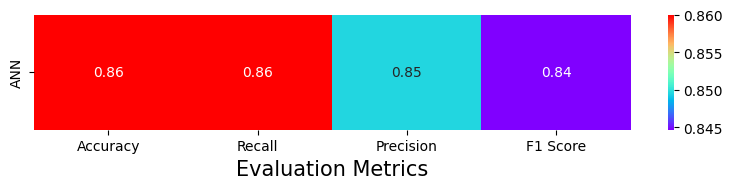

In [25]:
plt.figure(figsize=(8,2))
sns.heatmap(results_df,annot=True,cmap="rainbow")
plt.xlabel("Evaluation Metrics",fontsize=15)
plt.tight_layout()
plt.show()

<Axes: >

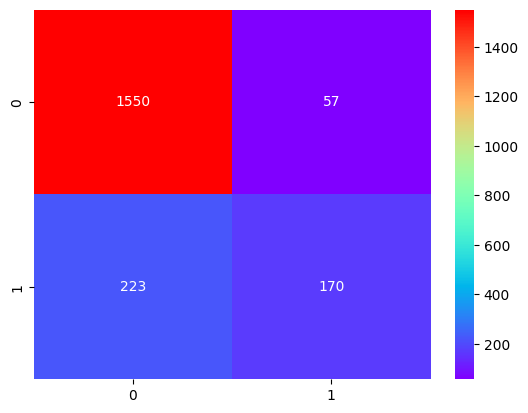

In [26]:
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="rainbow")